In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate as tb
from collections import Counter

## Data Description

NOTE:

Data contains class as 0 for Not-Fraud and 1 for Fraud.


Time      : Continuous. Seconds elapsed between each transaction and the first transaction in the dataset.

Amount    : Continuous/numerical. Amount of money in the transaction. Can be ranked from lowest transaction to highest transaction.

Class     : Nominal. Wheter the transaction is fraudulent (1) or not-fraudulent (0).

V1... V28 : Continuous, because they are data obtained by PCA.

In [2]:
df = pd.read_csv("creditcard.csv")

print(df.head(5))
print(f"Shape: {df.shape}")

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64


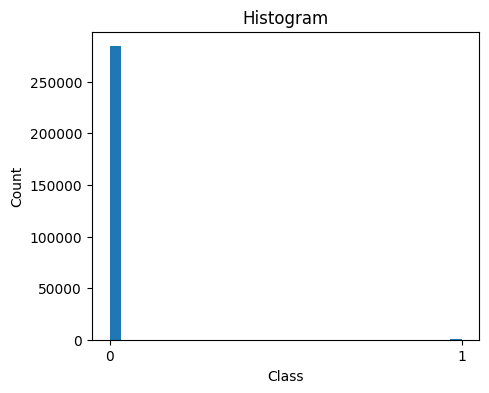

In [3]:
# Target : Class - Classification model needed.
print(df["Class"].describe())
# mean          0.001727
# std           0.041527

f = plt.figure(figsize = (5, 4))
plt.hist(df["Class"], bins = 30)
plt.title("Histogram")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks = (0, 1))
plt.show()

### NaN values

In [4]:
# These will give a percentage of missing values.

missing_row = df.isnull().sum(axis = 0) / df.shape[0]
missing_col = sum(df.isnull().sum(axis = 1)) != 0 / df.shape[0]

print(f"Fraction of missing values: {missing_row > 0}")
print(f"Fraction of points with missing values: {missing_col}")

Fraction of missing values: Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool
Fraction of points with missing values: False


### Per-feature analysis

In [5]:
check = df.drop("Class", axis = 1)
print(f"Unique dtypes: {pd.unique(check.dtypes)}")

for col in check.columns:
    print(col)
    if check[col].dtype == object:
        print(check[col].value_counts())
    else:
        print(check[col].describe())

Unique dtypes: [dtype('float64')]
Time
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64
V1
count    2.848070e+05
mean     1.175161e-15
std      1.958696e+00
min     -5.640751e+01
25%     -9.203734e-01
50%      1.810880e-02
75%      1.315642e+00
max      2.454930e+00
Name: V1, dtype: float64
V2
count    2.848070e+05
mean     3.384974e-16
std      1.651309e+00
min     -7.271573e+01
25%     -5.985499e-01
50%      6.548556e-02
75%      8.037239e-01
max      2.205773e+01
Name: V2, dtype: float64
V3
count    2.848070e+05
mean    -1.379537e-15
std      1.516255e+00
min     -4.832559e+01
25%     -8.903648e-01
50%      1.798463e-01
75%      1.027196e+00
max      9.382558e+00
Name: V3, dtype: float64
V4
count    2.848070e+05
mean     2.094852e-15
std      1.415869e+00
min     -5.683171e+00
25%     -8.486401e-01
50%     -1.984653e-02
75%

### Balance overview

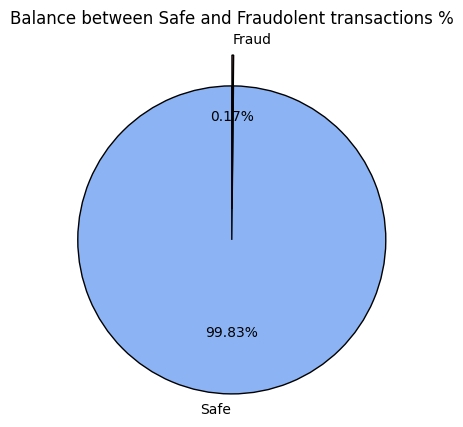

In [6]:
class_value = list(df["Class"].value_counts())


# This is for pie chart in %
pie = [class_value[0] / sum(class_value) * 100, class_value[1] / sum(class_value) * 100]
fig = plt.figure(figsize = (10, 5))
plt.pie(
    pie,
    labels      = ["Safe", "Fraud"],
    autopct     = "%1.2f%%",
    startangle  = 90,
    explode     = (0.1, 0.1),
    colors      = ["#8cb4f5", "#db7276"],
    wedgeprops  = {
        "edgecolor" : "black",
        "linewidth" : 1,
        "antialiased" : True
    }
)
plt.title("Balance between Safe and Fraudolent transactions %")
plt.show()

This is a pretty heavily unbalanced dataset, barely 0.17% of the data is a fraud case.

We will work with the dataset like this (because it's easier) and use f1 score for the metric.

But if you want, you could try to use oversampling or undersampling techniques (such as Smote), but that may cause problems.

### Outliers check

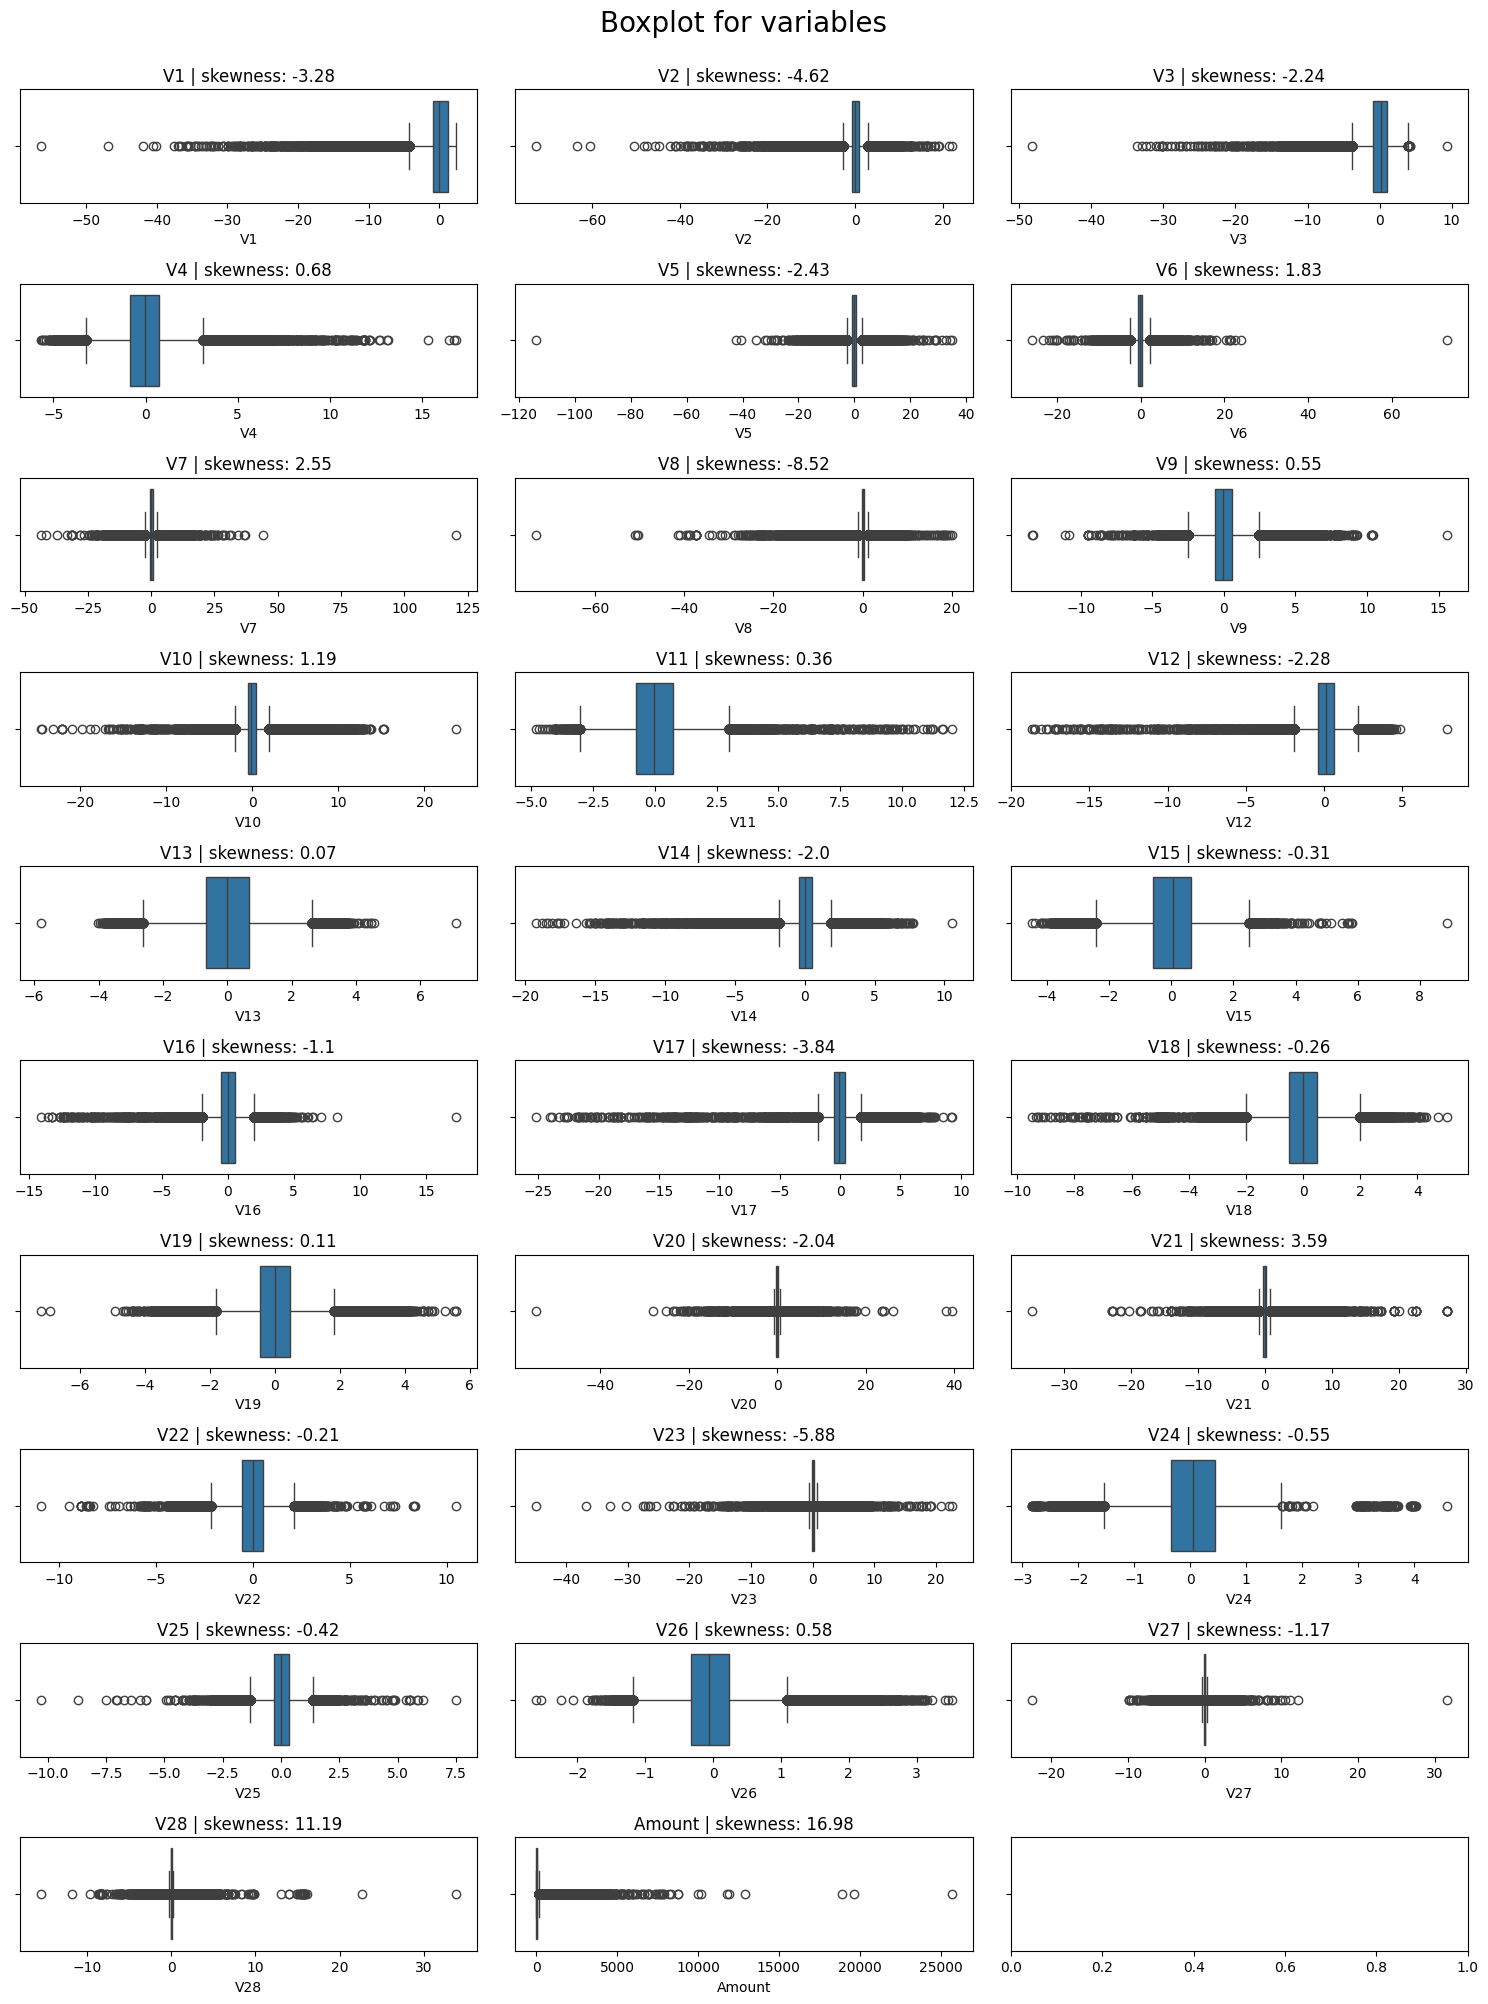

In [7]:
cols = (list(df.loc[:, "V1":"Amount"]))

def outlier_boxplot(dataset, col_list, rows, cols, title):
    fig, axs = plt.subplots(
        rows,
        cols,
        sharey  = True,
        figsize = (15, 20)
    )
    fig.suptitle(
        title,
        y       = 1,
        size    = 20
    )
    axs = axs.flatten()

    for i, data in enumerate(col_list):
        skewness = round(dataset[data].skew(axis = 0, skipna = True), 2)
        sns.boxplot(
            data    = dataset[data],
            orient  = "h",
            ax      = axs[i]
        )
        axs[i].set_title(f"{data} | skewness: {str(skewness)}")

outlier_boxplot(
    df,
    cols,
    10,
    3,
    title = "Boxplot for variables"
)
plt.tight_layout()

We can see there are a lot of outliers, some are also really big (see V28: <20, for example).

The skewness is highly asymmetrical, which might be because of not properly preprocessed data before the PCA process. (But in this case it's probably normal, since the original data is personal data, very asymmetrical by nature).

To check if i can remove the outliers i'll use the IQR as a threshold, and then also test the LOF method.

In [8]:
def iqr_detect(df, n, features):
    """
    Takes a dataframe and returns an index list corresponding to the observations containing more than n outliers according to the
    Tukey IQR method.
    - Marcin Rutecki from kaggle "How to create a meaningful EDA".
    """
    outliers = []

    for column in features:
        # First quartile
        q1 = np.percentile(df[column], 25)

        # Third quartile
        q3 = np.percentile(df[column], 75)
        
        # IQR
        iqr = q3 - q1

        # outliers
        step = 1.5 * iqr
        outliers_col = df[(df[column] < q1 - step) | (df[column] > q3 + step)].index
        outliers.extend(outliers_col)

    outliers = Counter(outliers)
    multiple_outliers = list(k for k, v in outliers.items() if v > n)

    out1 = df[df[column] < q1 - step]
    out2 = df[df[column] > q3 + step]

    print(f"Amount of outliers deleted: {out1.shape[0] + out2.shape[0]}")
    return multiple_outliers

outliers_iqr = iqr_detect(df, 1, cols)
df_out = df.drop(outliers_iqr, axis = 0).reset_index(drop = True)

Amount of outliers deleted: 31904


In [9]:
print(f"Frauds before dropping: {len(df[df["Class"] == 1])}")
print(f"Frauds after dropping: {len(df_out[df_out["Class"] == 1])}")

Frauds before dropping: 492
Frauds after dropping: 26


We can see almost all the fraud cases got deleted, this is kinda bad, this means we either don't use the IQR method, or you could try this: https://www.kaggle.com/code/marcinrutecki/credit-card-fraud-detection-tensorflow , where he explained very well how to combine the results between the dataset with only outliers, with the dataset without outliers, to make a way better model.

In my case, i'll go ahead and use the LOF method, which acts similarly.

### Outlier Detection with LOF

In [10]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors = 20, contamination = "auto")
outlier_pred = clf.fit_predict(df)

df_clean = df[outlier_pred == 1]
print(f"Frauds before dropping: {len(df[df["Class"] == 1])}")
print(f"Frauds after dropping: {len(df_clean[df_clean["Class"] == 1])}")

Frauds before dropping: 492
Frauds after dropping: 393


In [11]:
print(f"Duped values: {df_clean.duplicated().sum()}")
df_copy_LOF = df_clean.copy()
df_copy_LOF.drop_duplicates(inplace = True)
print("Deleted duplicates")
print(f"Amount of frauds before: {len(df_clean[df_clean["Class"] == 1])}")
print(f"Amount of frauds after removing duplicates: {len(df_copy_LOF[df_copy_LOF["Class"] == 1])}")

Duped values: 1058
Deleted duplicates
Amount of frauds before: 393
Amount of frauds after removing duplicates: 384


Doesn't remove many frauds cases, so we can keep going!

/tmp/ipykernel_55468/2781955559.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


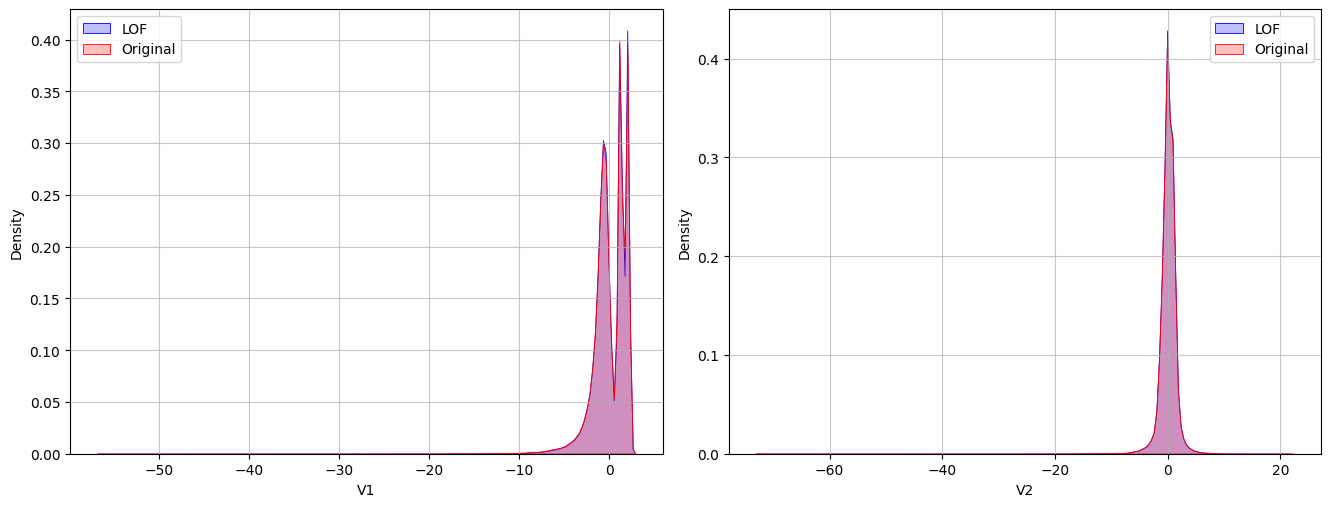

In [12]:
num_cols = (list(df.loc[:, "Time":"Amount"]))
# Each figure is 20w 50h
f = plt.figure(figsize = (20, 50))
# we have 10 rows and 3 columns
r, c = 10, 3

for idx, num in enumerate(num_cols[1:3]):
	# We add one subplot for each row/column by index.
	ax = f.add_subplot(r, c, idx+1)
	ax.grid(alpha = .7, axis = "both")
	# Train
	sns.kdeplot(
		x = num,
		fill = True,
		color = "blue",
		linewidth = .6,
		data = df_copy_LOF,
		label = "LOF"
	)
	sns.kdeplot(
		x = num,
		fill = True,
		color = "red",
		linewidth = .6,
		data = df,
		label = "Original"
	)
	ax.set_xlabel(num)
	ax.legend()

f.tight_layout()
f.show()

To avoid confusion, we can check the first two features.

Just out of curiosity i checked the distribution after removing the outliers, compared to the original dataset.
The distribution is pretty much the same, this means that removing the outliers didn't remove information from the dataset.

As a rule of thumb we can consider the LOF better if we need to know how data interacts with one another, making sure that we know who is a true outlier.

### Functions used

In [13]:
def correlation_table(df):
    plt.figure(figsize = (11, 11))
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype = bool))
    color = sns.color_palette("Blues", as_cmap=True)
    sns.heatmap(corr, mask = mask, vmin = -0.20, vmax = 0.20, robust = False, center = 0, square = True, cmap = color, linewidths = .5)
    plt.title("Correlation Table")
    plt.show()

def get_correlation(
        dataframe,
        class_name = "",

):
    fig, axs = plt.subplots(nrows = 1, ncols = 2, sharey = False, figsize = (10, 5))
    fig.suptitle("Correlations with Binary class")
    # Features correlated to class
    axs[0].set_title("Features Correlated to class")
    sorted_df = dataframe.corr()[class_name][:-1].abs().sort_values()
    sorted_df.plot(ax = axs[0], kind = "bar", title= f"Features correlated with {class_name}")

    # Most influent features scatterplot
    most_influent_x = sorted_df.index[-1]
    most_influent_y = sorted_df.index[-2]
    sns.scatterplot(ax = axs[1], x = most_influent_x, y = most_influent_y, hue = class_name, data = dataframe, palette = "dark", s = 9)
    axs[1].set_title("Most influent Features correlation.")

def scale_data(df):
    x = df.drop(["Class", "Time"], axis = 1).values
    y = df["Class"].values

    from sklearn.model_selection import train_test_split

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 42)
    print(f"Len of x_train/test: {len(x_train)} | {len(x_test)}")
    print(f"Len of y_train/test: {len(y_train)} | {len(y_test)}")

    print(f"x_train type: {type(x_train)}")
    from sklearn.preprocessing import MinMaxScaler

    mms = MinMaxScaler()

    x_train = mms.fit_transform(x_train)
    x_test = mms.transform(x_test)
    print("Min max scaler applied!")
    return x_train, x_test, y_train, y_test

def get_model():
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout

    tf.keras.backend.clear_session()

    model = Sequential()
    model.add(Dense(units = 29, activation = "relu"))
    model.add(Dropout(0.3))

    model.add(Dense(units = 14 ,activation = "relu"))
    model.add(Dropout(0.1))

    model.add(Dense(units = 7, activation = "relu"))

    model.add(Dense(units = 2,activation='relu'))

    model.add(Dense(units = 1, activation = "sigmoid"))

    earlyStopping = tf.keras.callbacks.EarlyStopping(
        monitor = "val_loss",
        patience = 5,
        mode = "auto",
        verbose = 2
    )

    model.compile(
        loss = "binary_crossentropy",
        optimizer = "adam"
    )

    return model, earlyStopping

def get_metrics(model, x_test, y_test):
    from sklearn.metrics import classification_report, f1_score, accuracy_score

    predictions = (model.predict(x_test) > 0.5) * 1
    f1 = f1_score(y_test, predictions)

    print(classification_report(y_test, predictions))
    print(f"F1: {f1}")
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")

## Model with LOF

### Correlations Graphs

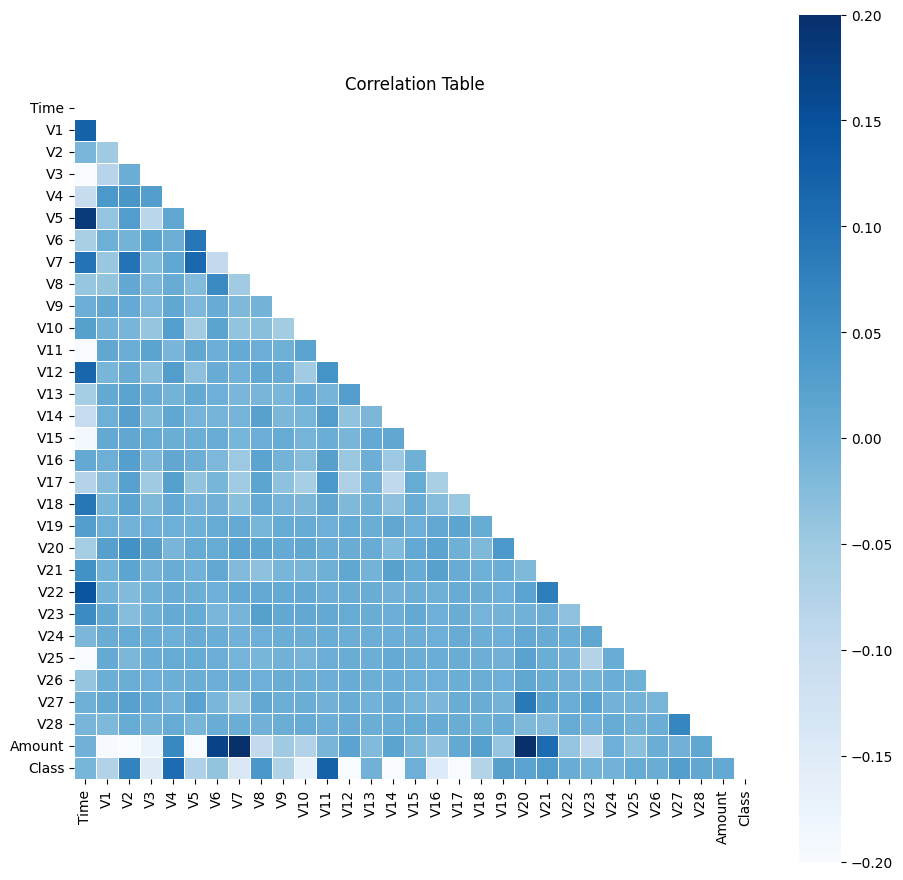

In [14]:
correlation_table(df_copy_LOF)

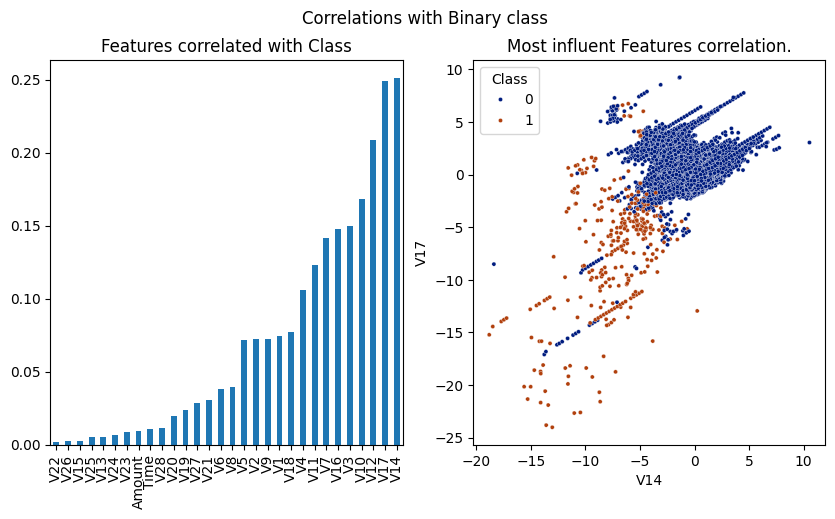

In [15]:
get_correlation(df_copy_LOF, "Class")


### Dataset Scaling

In [16]:
x_train_LOF, x_test_LOF, y_train_LOF, y_test_LOF = scale_data(df_copy_LOF)

Len of x_train/test: 195610 | 83833
Len of y_train/test: 195610 | 83833
x_train type: <class 'numpy.ndarray'>
Min max scaler applied!


### Training

In [17]:
model_LOF, earlyStopping_LOF = get_model()
hist_LOF = model_LOF.fit(
    x = x_train_LOF,
    y = y_train_LOF,
    epochs = 50,
    batch_size = 32,
    validation_data = (x_test_LOF, y_test_LOF),
    callbacks = [earlyStopping_LOF],
    verbose = 2
)

2025-11-19 14:41:04.875942: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50


I0000 00:00:1763563266.188017   55468 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9269 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:07:00.0, compute capability: 8.6
2025-11-19 14:41:07.223670: I external/local_xla/xla/service/service.cc:163] XLA service 0x7f1054007870 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-19 14:41:07.223682: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-11-19 14:41:07.246301: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-19 14:41:07.417741: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91600
I0000 00:00:1763563268.966809   56788 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at mos

6113/6113 - 13s - 2ms/step - loss: 0.0119 - val_loss: 0.0040
Epoch 2/50
6113/6113 - 8s - 1ms/step - loss: 0.0049 - val_loss: 0.0030
Epoch 3/50
6113/6113 - 8s - 1ms/step - loss: 0.0045 - val_loss: 0.0028
Epoch 4/50
6113/6113 - 8s - 1ms/step - loss: 0.0044 - val_loss: 0.0033
Epoch 5/50
6113/6113 - 9s - 1ms/step - loss: 0.0043 - val_loss: 0.0030
Epoch 6/50
6113/6113 - 9s - 1ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 7/50
6113/6113 - 8s - 1ms/step - loss: 0.0041 - val_loss: 0.0031
Epoch 8/50
6113/6113 - 8s - 1ms/step - loss: 0.0041 - val_loss: 0.0029
Epoch 8: early stopping


<Axes: >

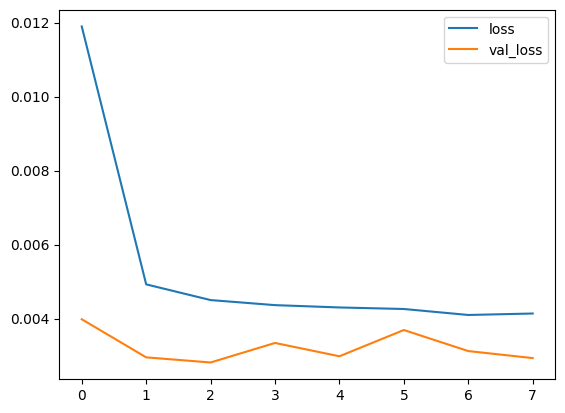

In [18]:
model_loss_LOF = pd.DataFrame(hist_LOF.history)
model_loss_LOF.plot()

## Final Review

In [19]:
get_metrics(model_LOF, x_test_LOF, y_test_LOF)

2620/2620 ━━━━━━━━━━━━━━━━━━━━ 2s 672us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     83727
           1       0.90      0.72      0.80       106

    accuracy                           1.00     83833
   macro avg       0.95      0.86      0.90     83833
weighted avg       1.00      1.00      1.00     83833

F1: 0.8
Accuracy: 0.9995467178795939


We can say that the model, even with the low amount of labels, did a really good job at generalizing.

The accuracy is scored at 99%, but since the data was heavily unbalanced, we should look at the F1 score, which is scored at a more realistical 0.80%.

If you've seen the notebook tagged at the end of the IQR test section, you can see his overall F1 score is 0.795~, a 0.005% difference.
Depending on weight initialization, and a lot more factors such as metrics used (ROC, etc...), results may vary. Nonetheless this shows that both methods are very reliable.